There are 17 pads with a total of 57147 elementary operations
PAD:Group 6_session 1

SCORES
User proportion per paragraph score:0.153227582444
Proportion score:0.853608758871
Synchronous score:0.8988596926127947
Alternating score:0.11363636363636363
Break score day:6.826255491190095e-06
Break score short:5.461004392952076e-06
Overall write type score:0.18855218855218855
Overall paste type score:0.06565656565656566
Overall delete type score:0.07407407407407407
Overall edit type score:0.6717171717171717
User write score:0.864672601236
User paste score:0.75753567212
User delete score:0.761346680891
User edit score:0.960455578743
PAD:Group 3_session 1

SCORES
User proportion per paragraph score:0.181084829819
Proportion score:0.958017780914
Synchronous score:0.8802837718001787
Alternating score:0.2553191489361702
Break score day:6.618601471787944e-06
Break score short:7.942321766145534e-06
Overall write type score:0.3049792531120332
Overall paste type score:0.058091286307053944
Overall del

PAD:Group 5_session 1

SCORES
User proportion per paragraph score:0.0151357673707
Proportion score:0.772702498857
Synchronous score:0.5849950295304377
Alternating score:0.15254237288135594
Break score day:6.821484830747665e-06
Break score short:6.821484830747665e-06
Overall write type score:0.3643410852713178
Overall paste type score:0.046511627906976744
Overall delete type score:0.07751937984496124
Overall edit type score:0.5116279069767442
User write score:0.997244285853
User paste score:0.75841890572
User delete score:0.95280346393
User edit score:0.995344466849
PAD:Group 7_session 1

SCORES
User proportion per paragraph score:0.198062936088
Proportion score:0.874577606942
Synchronous score:0.804298341561475
Alternating score:0.16666666666666666
Break score day:6.822348418627257e-06
Break score short:9.551287786078158e-06
Overall write type score:0.27
Overall paste type score:0.04666666666666667
Overall delete type score:0.10333333333333333
Overall edit type score:0.58
User write sc

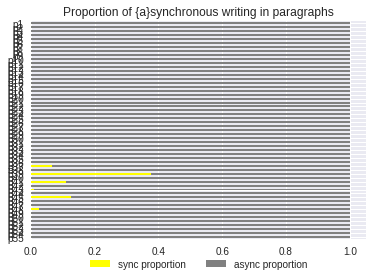

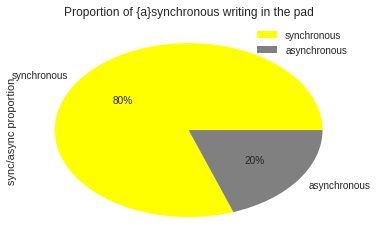

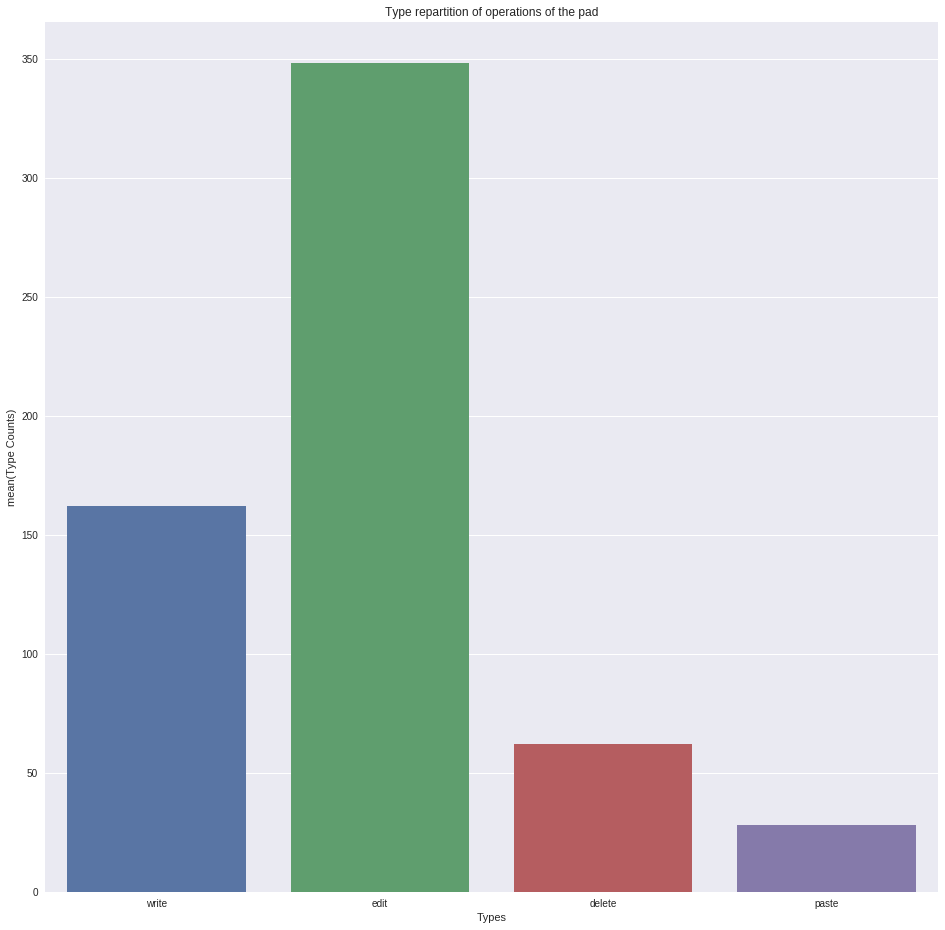

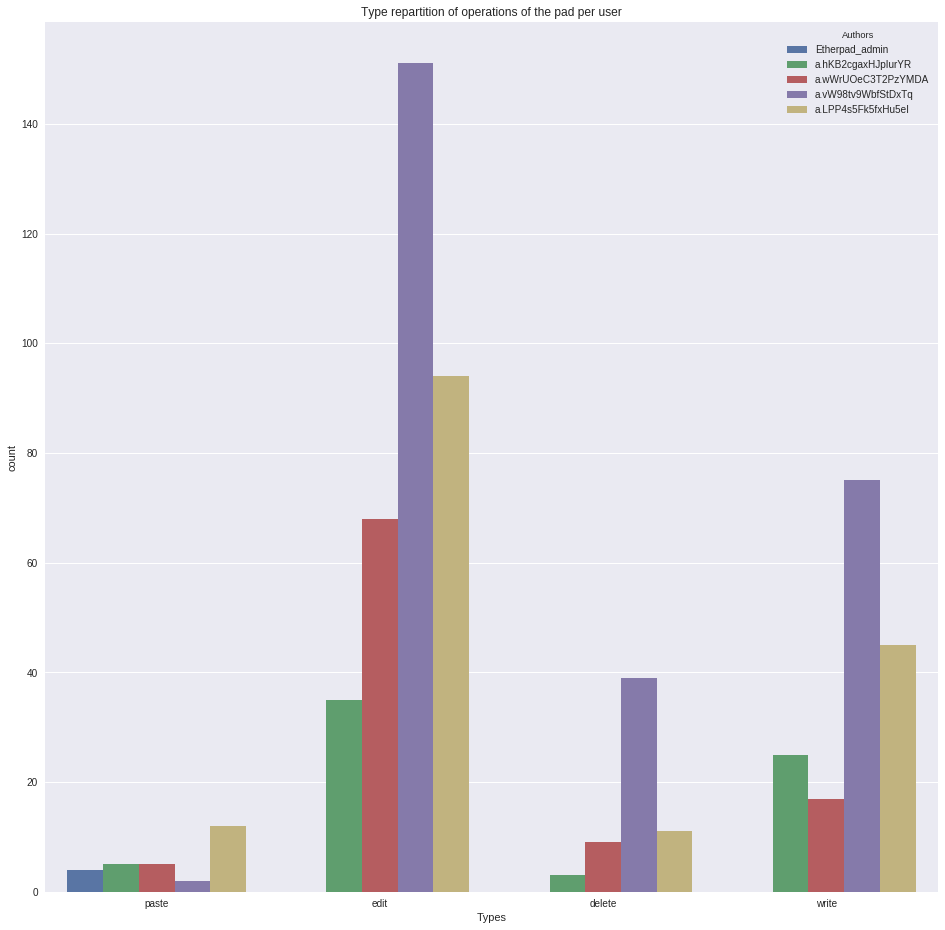

In [97]:
import config
from analytics import operation_builder
from analytics.parser import *
from analytics.visualization import *
import os

list_of_elem_ops_per_pad = dict()
elemOpsCounter = 0
root_of_dbs = "belgian_experiment/"
for (dirpath, dirnames, filenames) in os.walk(root_of_dbs):
    for filename in filenames:
        if ".db" in filename:
            path_to_db = os.path.join(dirpath, filename)
            list_of_elem_ops_per_main, _ = get_elem_ops_per_pad_from_db(path_to_db=path_to_db, editor='etherpadSQLite3')
            pad_name = path_to_db[len(root_of_dbs):path_to_db.find("data") - 1]
            assert len(list_of_elem_ops_per_main.keys()) == 1
            list_of_elem_ops_per_pad[pad_name] = list_of_elem_ops_per_main['main']

pads, _, elem_ops_treated = operation_builder.build_operations_from_elem_ops(list_of_elem_ops_per_pad,
                                                                             config.maximum_time_between_elem_ops)

for pad_name in pads:
    elemOpsCounter += len(elem_ops_treated[pad_name])
    pad = pads[pad_name]
    # create the paragraphs
    pad.create_paragraphs_from_ops(elem_ops_treated[pad_name])
    # classify the operations of the pad
    pad.classify_operations(length_edit=config.length_edit, length_delete=config.length_delete)
    # find the context of the operation of the pad
    pad.build_operation_context(config.delay_sync, config.time_to_reset_day, config.time_to_reset_break)

print("There are %s pads with a total of %s elementary operations" % (str(len(pads)), str(elemOpsCounter)))

user_participation_paragraph_score_list = []
prop_score_list = []
sync_score_list = []
alternating_score_list = []
break_score_day_list = []
break_score_short_list = []
type_overall_score_write_list = []
type_overall_score_delete_list = []
type_overall_score_edit_list = []
type_overall_score_paste_list = []
user_type_score_delete_list = []
user_type_score_edit_list = []
user_type_score_write_list = []
user_type_score_paste_list = []

pad_names = list(pads)
for pad_name in pad_names:
    pad = pads[pad_name]
    user_participation_paragraph_score = pad.user_participation_paragraph_score()
    user_participation_paragraph_score_list.append(user_participation_paragraph_score)
    prop_score = pad.prop_score()
    prop_score_list.append(prop_score)
    sync_score = pad.sync_score()[0]
    sync_score_list.append(sync_score)
    alternating_score = pad.alternating_score()
    alternating_score_list.append(alternating_score)
    break_score_day = pad.break_score('day')
    break_score_day_list.append(break_score_day)
    break_score_short = pad.break_score('short')
    break_score_short_list.append(break_score_short)
    type_overall_score_write = pad.type_overall_score('write')
    type_overall_score_write_list.append(type_overall_score_write)
    type_overall_score_paste = pad.type_overall_score('paste')
    type_overall_score_paste_list.append(type_overall_score_paste)
    type_overall_score_delete = pad.type_overall_score('delete')
    type_overall_score_delete_list.append(type_overall_score_delete)
    type_overall_score_edit = pad.type_overall_score('edit')
    type_overall_score_edit_list.append(type_overall_score_edit)
    user_type_score_write = pad.user_type_score('write')
    user_type_score_write_list.append(user_type_score_write)
    user_type_score_paste = pad.user_type_score('paste')
    user_type_score_paste_list.append(user_type_score_paste)
    user_type_score_delete = pad.user_type_score('delete')
    user_type_score_delete_list.append(user_type_score_delete)
    user_type_score_edit = pad.user_type_score('edit')
    user_type_score_edit_list.append(user_type_score_edit)
    
               #+ "TEXT:\n" + pad.get_text() + "\n" \
               #+ '\nCOLORED TEXT BY AUTHOR\n' + pad.display_text_colored_by_authors() + "\n" \
               #+ '\nCOLORED TEXT BY OPS\n' + pad.display_text_colored_by_ops() + "\n" \
    to_print = "PAD:" + pad_name + "\n" \
               + '\nSCORES' \
               + '\nUser proportion per paragraph score:' + str(user_participation_paragraph_score) \
               + '\nProportion score:' + str(prop_score) \
               + '\nSynchronous score:' + str(sync_score) \
               + '\nAlternating score:' + str(alternating_score) \
               + '\nBreak score day:' + str(break_score_day) \
               + '\nBreak score short:' + str(break_score_short) \
               + '\nOverall write type score:' + str(type_overall_score_write) \
               + '\nOverall paste type score:' + str(type_overall_score_paste) \
               + '\nOverall delete type score:' + str(type_overall_score_delete) \
               + '\nOverall edit type score:' + str(type_overall_score_edit) \
               + '\nUser write score:' + str(user_type_score_write) \
               + '\nUser paste score:' + str(user_type_score_paste) \
               + '\nUser delete score:' + str(user_type_score_delete) \
               + '\nUser edit score:' + str(user_type_score_edit)
    print(to_print)
    with open("testing stuff/texts/" + pad_name + ".txt", "w+", encoding='utf-8') as f:
        f.write(to_print)

    display_user_participation(pad, 'testing_stuff/figures')
    # plot the participation proportion per user per paragraphs
    display_user_participation_paragraphs(pad, 'testing_stuff/figures')
    display_user_participation_paragraphs_with_del(pad, 'testing_stuff/figures')

    # plot the proportion of synchronous writing per paragraphs
    display_proportion_sync_in_paragraphs(pad, 'testing_stuff/figures')
    display_proportion_sync_in_pad(pad, 'testing_stuff/figures')

    # plot the overall type counts
    display_overall_op_type(pad, 'testing_stuff/figures')

    # plot the counts of type per users
    display_types_per_user(pad, 'testing_stuff/figures')


In [110]:
df = pd.DataFrame(list(pads),columns = ['pad_name'])
df['User proportion per paragraph score'] = user_participation_paragraph_score_list
df['Proportion score'] = prop_score_list
df['Synchronous score'] = sync_score_list
df['Alternating score'] = alternating_score_list
df['Break score day'] = break_score_day_list
df['Break score short'] = break_score_short_list
df['User write score'] = user_type_score_write_list
df['User paste score'] = user_type_score_paste_list
df['User delete score'] = user_type_score_delete_list
df['User edit score'] = user_type_score_edit_list
df['Overall write type score']= type_overall_score_write_list
df['Overall paste type score']= type_overall_score_paste_list
df['Overall delete type score']= type_overall_score_delete_list
df['Overall edit type score']= type_overall_score_edit_list

In [111]:
df

,pad_name,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,User edit score,Overall write type score,Overall paste type score,Overall delete type score,Overall edit type score
0,Group 6_session 1,0.153228,0.853609,0.898860,0.113636,0.000007,0.000005,0.864673,0.757536,0.761347,0.960456,0.188552,0.065657,0.074074,0.671717
1,Group 3_session 1,0.181085,0.958018,0.880284,0.255319,0.000007,0.000008,0.992700,0.965313,0.952609,0.997640,0.304979,0.058091,0.087137,0.549793
2,Group 17_session 1,0.275279,0.873666,0.831393,0.061224,0.000008,0.000010,0.976463,0.912466,0.970146,0.989873,0.270619,0.054124,0.051546,0.623711
3,Group 9_session 1,0.095862,0.894304,0.946530,0.136364,0.000004,0.000003,0.985940,0.718340,0.912854,0.987111,0.227723,0.137199,0.117397,0.517680
4,Group 14_session 1,0.131056,0.956374,0.766428,0.155340,0.000007,0.000005,0.982476,0.938238,0.971943,0.996308,0.257194,0.050360,0.077338,0.615108
5,Group 13_session 1,0.143141,0.888465,0.891438,0.153846,0.000007,0.000007,0.955425,0.918107,0.890671,0.992134,0.213884,0.105066,0.165103,0.515947
6,Group 4_session1-,0.087648,0.916728,0.786707,0.174757,0.000008,0.000007,0.993939,0.830085,0.982813,0.997950,0.296774,0.086022,0.068817,0.548387
7,Group 12_session 1,0.326616,0.947662,0.897158,0.163636,0.000007,0.000007,0.959317,0.857777,0.943568,0.981109,0.267227,0.080672,0.092437,0.559664
8,Group 16_session 1,0.148929,0.909048,0.825517,0.243902,0.000007,0.000004,0.996714,0.990687,0.903177,0.992944,0.327044,0.081761,0.069182,0.522013
9,Group 10_session 1,0.260707,0.930220,0.888037,0.238806,0.000007,0.000007,0.954046,0.536175,0.914624,0.994895,0.231908,0.110197,0.062500,0.595395


In [112]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
df = df.set_index('pad_name')

In [114]:
df.describe()

,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,User edit score,Overall write type score,Overall paste type score,Overall delete type score,Overall edit type score
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.173464,0.892876,0.811710,0.175394,0.000007,0.000007,0.963315,0.821366,0.925438,0.991884,0.259791,0.084655,0.082398,0.573156
std,0.091051,0.068762,0.095128,0.054413,0.000001,0.000002,0.036642,0.126155,0.060996,0.009181,0.046548,0.042803,0.029744,0.055200
min,0.015136,0.707985,0.584995,0.061224,0.000004,0.000003,0.864673,0.536175,0.761347,0.960456,0.188552,0.042654,0.043243,0.511628
25%,0.130608,0.873666,0.770023,0.145833,0.000007,0.000005,0.955425,0.757536,0.903177,0.992134,0.227723,0.050360,0.068720,0.522013
50%,0.153228,0.909048,0.825517,0.163636,0.000007,0.000007,0.974930,0.853131,0.943568,0.995501,0.257194,0.080672,0.074074,0.559242
75%,0.260707,0.947662,0.888037,0.233333,0.000007,0.000008,0.985940,0.914544,0.971266,0.996308,0.296703,0.105066,0.092437,0.615108
max,0.326616,0.959035,0.946530,0.255319,0.000009,0.000011,0.997244,0.990687,0.987466,0.997950,0.364341,0.199005,0.165103,0.671717


# Correlations

In [115]:
df.corr()

,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,User edit score,Overall write type score,Overall paste type score,Overall delete type score,Overall edit type score
User proportion per paragraph score,1.000000,0.198027,0.240750,0.159933,0.308543,0.045590,-0.258789,-0.037400,0.061405,-0.108679,-0.184714,0.054455,-0.042573,0.136477
Proportion score,0.198027,1.000000,0.129249,0.483724,-0.340614,-0.049105,0.440881,0.460565,0.495494,0.089134,-0.352194,0.207758,-0.305843,0.300694
Synchronous score,0.240750,0.129249,1.000000,-0.198178,-0.205659,-0.327595,-0.251919,-0.110411,-0.457460,-0.421579,-0.349257,-0.084743,0.438624,0.123878
Alternating score,0.159933,0.483724,-0.198178,1.000000,-0.069237,-0.065225,0.254787,0.148578,0.343979,0.415325,0.100620,0.245687,-0.193096,-0.171311
Break score day,0.308543,-0.340614,-0.205659,-0.069237,1.000000,0.278563,-0.297784,0.005535,0.051265,0.205988,0.236668,-0.448169,-0.164474,0.236570
Break score short,0.045590,-0.049105,-0.327595,-0.065225,0.278563,1.000000,-0.053297,0.082657,0.268508,0.271166,-0.034911,0.117536,-0.271346,0.084512
User write score,-0.258789,0.440881,-0.251919,0.254787,-0.297784,-0.053297,1.000000,0.408607,0.706881,0.624798,0.451716,-0.033715,-0.147799,-0.275131
User paste score,-0.037400,0.460565,-0.110411,0.148578,0.005535,0.082657,0.408607,1.000000,0.456965,0.089861,0.183925,-0.255418,-0.007775,0.047148
User delete score,0.061405,0.495494,-0.457460,0.343979,0.051265,0.268508,0.706881,0.456965,1.000000,0.633203,0.285562,-0.006897,-0.312079,-0.067295
User edit score,-0.108679,0.089134,-0.421579,0.415325,0.205988,0.271166,0.624798,0.089861,0.633203,1.000000,0.392665,0.054161,-0.060132,-0.340714


# Kmeans and PCA

/home/pace/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Difference in cluster centers features
[('User proportion per paragraph score', -0.0040513784148237808),
 ('Proportion score', -0.063906218952697991),
 ('Synchronous score', 0.089215834009050421),
 ('Alternating score', -0.029701968844223575),
 ('Break score day', -3.3906119174038747e-07),
 ('Break score short', -1.1039128555621447e-06),
 ('User write score', -0.045436069707918247),
 ('User paste score', -0.22595414640829325),
 ('User delete score', -0.096317320656487015),
 ('User edit score', -0.00688927875502654),
 ('Overall write type score', -0.03452181393693679),
 ('Overall paste type score', 0.02146005788224413),
 ('Overall delete type score', 0.0077024618181414234),
 ('Overall edit type score', 0.0053592942365512375)]

Difference between the mean features of each cluster
User proportion per paragraph score   -4.051378e-03
Proportion score                      -6.390622e-02
Synchronous score                      8.921583e-02
Alternating score                     -2.970197e-02
Bre

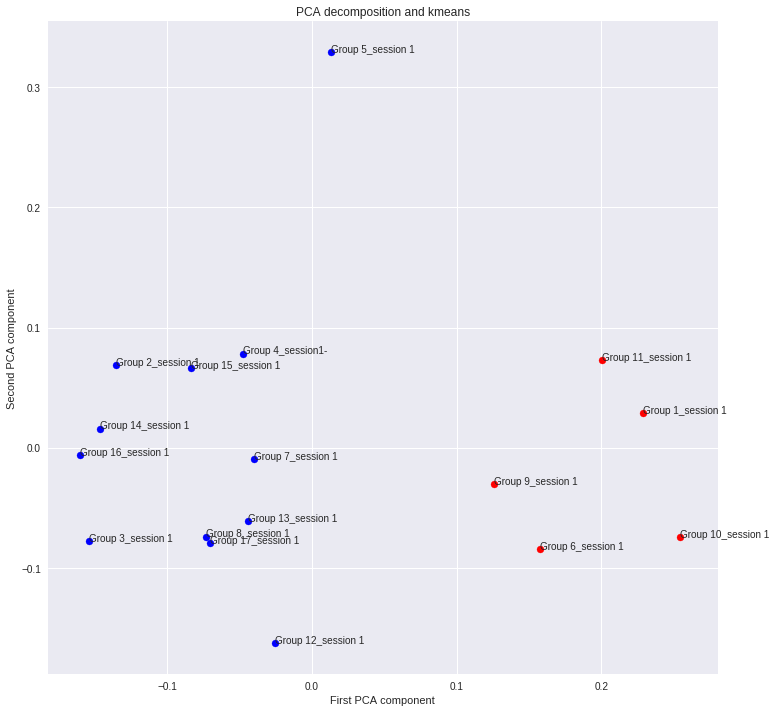

In [116]:
kmeans = KMeans(n_clusters=2)
assignments = kmeans.fit_predict(df)

pca = PCA(n_components=2,random_state=1)
pca.fit(df)

df_0 = df[assignments == 0]
X_0 = pca.transform(df_0)
pad_names_0 = np.array(pad_names)[assignments == 0]
df_1 = df[assignments == 1]
X_1 = pca.transform(df_1)
pad_names_1 = np.array(pad_names)[assignments == 1]

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X_0.T[0],X_0.T[1],color='red')
for i, txt in enumerate(pad_names_0):
    ax.annotate(txt, (X_0.T[0][i],X_0.T[1][i]))
ax.scatter(X_1.T[0],X_1.T[1],color='blue')
for i, txt in enumerate(pad_names_1):
    ax.annotate(txt, (X_1.T[0][i],X_1.T[1][i]))
ax.set_title('PCA decomposition and kmeans')
ax.set_xlabel('First PCA component')
ax.set_ylabel('Second PCA component')
fig.show()

print('Difference in cluster centers features')
pprint(list(zip(df.columns,kmeans.cluster_centers_[0]-kmeans.cluster_centers_[1])))

print("\nDifference between the mean features of each cluster")
pprint((df_0.describe()-df_1.describe()).loc['mean'])

In [117]:
df_0['User paste score']

pad_name
Group 6_session 1     0.757536
Group 9_session 1     0.718340
Group 10_session 1    0.536175
Group 11_session 1    0.634212
Group 1_session 1     0.663084
Name: User paste score, dtype: float64

In [118]:
df_1['User paste score']

pad_name
Group 3_session 1     0.965313
Group 17_session 1    0.912466
Group 14_session 1    0.938238
Group 13_session 1    0.918107
Group 4_session1-     0.830085
Group 12_session 1    0.857777
Group 16_session 1    0.990687
Group 15_session 1    0.848729
Group 2_session 1     0.914544
Group 8_session 1     0.853131
Group 5_session 1     0.758419
Group 7_session 1     0.866387
Name: User paste score, dtype: float64

## Study of the outlier

In [119]:
df_wo_outlier = df[df.index != 'Group 5_session 1']
df.loc['Group 5_session 1']- df_wo_outlier.describe().loc['mean']

User proportion per paragraph score   -1.682232e-01
Proportion score                      -1.276839e-01
Synchronous score                     -2.408851e-01
Alternating score                     -2.427981e-02
Break score day                       -2.393873e-07
Break score short                     -2.374290e-07
User write score                       3.604948e-02
User paste score                      -6.688170e-02
User delete score                      2.907582e-02
User edit score                        3.676241e-03
Overall write type score               1.110844e-01
Overall paste type score              -4.052760e-02
Overall delete type score             -5.183590e-03
Overall edit type score               -6.537320e-02
dtype: float64